## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

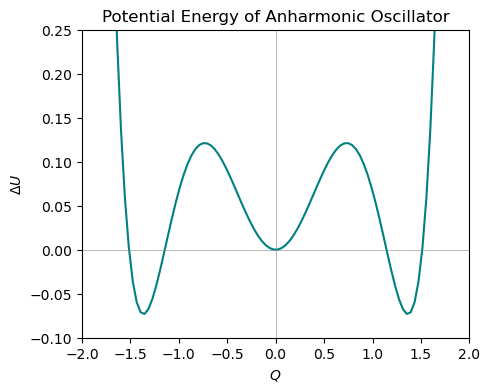

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_potential_energy(K=1.0, D=2.4, Phi=1.0):
    # define potential function
    def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
        return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6
    
    # define mesh for plotting
    Q_mesh = np.linspace(-2,2,100)
    U_mesh = potential_energy(Q_mesh, K, D, Phi)
    
    # construct figure
    plt.figure(figsize=(5, 4))
    plt.plot(Q_mesh, U_mesh, color="teal")
    plt.title("Potential Energy of Anharmonic Oscillator")
    plt.xlabel("$Q$")
    plt.ylabel("$\Delta U$")
    plt.xlim(-2,2)
    plt.ylim(-0.1,0.25)
    plt.axhline(linewidth='0.4',color='grey')
    plt.axvline(linewidth='0.4',color='grey')
    plt.show()

plot_potential_energy()

# widgets.interact(plot_potential_energy,
#                  K   = widgets.FloatSlider(min=0, max=5, step=0.1, value=1.0, description='$K$'),
#                  D   = widgets.FloatSlider(min=0, max=5, step=0.1, value=2.4, description='$D$'),
#                  Phi = widgets.FloatSlider(min=0, max=5, step=0.1, value=1.0, description='$\Phi$')
#                 )

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$

Create a figure that shows angular frequency $\omega$ vs initial amplitude $Q_0$.

**PLAN**:
* Plot potential energy with changeable $K$, $D$, and $\Phi$ values to explore the dynamics of the problem
* Solve equations of motion (try analytically first, if I get stuck then use a numerical solver)
* Plot $Q(t)$ vs $Q_0$ with adjustable $Q_0$ values with anharmonic and harmonic case
* Extract approximate $\tau$ values for each $Q_0$ to get a guess for a minima finder
* Minima finder will give half-period, double each value to get numerically solved $\tau$
* Convert $\tau$ to $\omega$ with $\omega = \frac{2\pi}{\tau}$
* Use the approximated $\omega$ values to create the plot of $\omega$ vs $Q_0$

#### Equations of Motion:

$\Delta U = \frac12KQ^2 - \frac14DQ^4 + \frac16\Phi Q^6$

---

$Q(t) = Acos(\omega t) + Bsin(\omega t)$

$\dot Q(t) = -A\omega sin(\omega t) + B\omega cos(\omega t)$

$\ddot Q(t) = -A\omega^2cos(\omega t) - B\omega^2 sin(\omega t)$

---

$Q(0) = Q_0 = Acos(0) + Bsin(0) \rightarrow A = Q_0$

$\dot Q(0) = V_0 = -A\omega_0sin(0) + B\omega_0cos(0) \rightarrow B = \frac{V_0}{\omega_0}$

---

$\omega = \sqrt{\frac{1}{M}\frac{d^2U}{dQ^2}} \rightarrow \omega = \sqrt{\frac{1}{M}(K - 3DQ^2 + 5\Phi Q^4)} \rightarrow \omega_0 = \sqrt{\frac{K}{M}}$

---

$Q(t) = Q_0cos(\omega t) + \frac{V_0}{\omega_0}sin(\omega t)$

$\omega = \sqrt{\frac{1}{M}(K - 3DQ^2 +5\Phi Q^4)}$

Small angle approximation: $(1 + \epsilon)^\frac12 = 1 + \epsilon + ...$

$\omega = \sqrt{\frac{K}{M}}\sqrt{1 - \frac{3D}{K}Q^2 + \frac{5\Phi}{K}Q^4} \approx \sqrt{\frac{K}{M}}(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

$\omega = \omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

#### To use RK45 Solver:

Define first-order system of differential equations:

$\dot Q = V$

$\dot V = -\frac{K}{M}Q + \frac{D}{M}Q^3 - \frac{\Phi}{M}Q^5$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import solve_ivp

# plot Q(t) vs Q_0
def plot_Q_vs_Q0(Q0, t_max=25):
    
    def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
        return -((1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6)
        
    # omega = omega0 for harmonic case
    def eqs_motion_harmonic(t_vals, Q0 = 0.1, V0 = 0.0, K=1.0, D=2.4, Phi=1.0, M = 1.0):
        omega0 = np.sqrt(K/M)
        return Q0*np.cos(omega0*t_vals) + V0/omega0*np.sin(omega0*t_vals)

    def anharmonic_oscillator(t_vals, y, K=1.0, D=2.4, Phi=1.0, M = 1.0):
        Q, V = y
        dQdt = V
        dVdt = -(K/M*Q) + (D/M*Q**3) - (Phi/M*Q**5)
        return [dQdt, dVdt]

    # initial conditions
    V0  = 0
    K   = 1.0
    D   = 2.4
    Phi = 1.0
    M   = 1.0
    
    y0 = Q0, V0
    sol = solve_ivp(anharmonic_oscillator,
                [0, t_max],
                y0,
                t_eval=np.linspace(0, t_max, 500),
                args=(K, D, Phi, M))
    
    # define mesh for plotting
    t_vals = np.linspace(0,t_max,500)
    Q_vals_harmonic   = eqs_motion_harmonic(t_vals, Q0)
    Q_vals_anharmonic = sol.y[0]
    U_vals = potential_energy(Q_vals_anharmonic)
    
    # construct figure
    plt.figure(figsize=(12, 4))
    
    plt.plot(t_vals, U_vals, color="grey", label="Anharmonic Potential Energy $U(Q)$")
    plt.plot(t_vals, Q_vals_harmonic, color="teal", label="Harmonic Oscillator")
    plt.plot(t_vals, Q_vals_anharmonic, color="red", label="Anharmonic Oscillator")
    plt.title("$Q(t)$ vs time with changeable $Q_0$")
    plt.xlabel("$t$")
    plt.ylabel("$Q(t)$")
    plt.xlim(0,t_max)
    plt.ylim(-1.8,1.8)
    plt.axhline(linewidth='0.4', color='grey')
    # plt.axvline(x = period_interp(Q0), linewidth='0.4', color='grey')
    plt.legend()
    plt.show()
    # print(period_interp(Q0))

widgets.interact(plot_Q_vs_Q0,
                 Q0    = widgets.FloatSlider(min=0, max=1.75, step=0.005, value=0.6, description='$Q_0$', readout_format = '.3f'),
                 t_max = widgets.FloatSlider(min=0.0,  max=200,  step=1.0, value=25.0, description='Max Time')
                )

interactive(children=(FloatSlider(value=0.6, description='$Q_0$', max=1.75, readout_format='.3f', step=0.005),…

<function __main__.plot_Q_vs_Q0(Q0, t_max=25)>

##### NOTE TO SELF:

When the amplitude of the anharmonic curve stays mostly in the same range as the harmonic, that's when it's in the central potential well. When it gets pointy above the teal curve (positive $Q(t)$ values), that's when it's in the right potential well. Below the teal curve is when it's in the left one. There's some weird behavior around the points where the initial potential is large enough to go through all three wells (e.g. $Q_0 = 0.720$), which I think may be an issue with the numerical equation solver

**"Experimental" Initial amplitude $Q_0$ vs period $\tau$**, setting the period of the harmonic case equal to 1 ($\tau_0 = 1$):

| $Q_0$   | $\tau$          | Rounded  | | | $Q_0$   | $\tau$          | Rounded  |
|---------|-----------------|----------|-|-|---------|-----------------|----------|
| $0.000$ | $1$             | $1.0000$ | | | $0.785$ | $\frac{27}{8}$  | $3.3750$ |
| $0.130$ | $\frac{72}{71}$ | $1.0141$ | | | $0.795$ | $\frac{29}{12}$ | $2.2308$ |
| $0.180$ | $\frac{37}{36}$ | $1.0277$ | | | $0.815$ | $\frac{13}{12}$ | $1.0833$ |
| $0.220$ | $\frac{23}{22}$ | $1.0455$ | | | $0.930$ | $\frac{4}{6}$   | $0.6666$ |
| $0.280$ | $\frac{14}{13}$ | $1.0769$ | | | $0.990$ | $\frac{6}{10}$  | $0.6000$ |
| $0.330$ | $\frac{10}{9}$  | $1.1111$ | | | $1.065$ | $\frac{5}{9}$   | $0.5556$ |
| $0.370$ | $\frac{8}{7}$   | $1.1429$ | | | $1.135$ | $\frac{22}{43}$ | $0.5116$ |
| $0.410$ | $\frac{13}{11}$ | $1.1818$ | | | $1.260$ | $\frac{6}{13}$  | $0.4615$ |
| $0.460$ | $\frac{5}{4}$   | $1.2500$ | | | $1.315$ | $\frac{14}{31}$ | $0.4516$ |
| $0.490$ | $\frac{14}{11}$ | $1.2727$ | | | $1.420$ | $\frac{5}{11}$  | $0.4545$ |
| $0.510$ | $\frac{4}{3}$   | $1.3333$ | | | $1.480$ | $\frac{10}{21}$ | $0.4762$ |
| $0.560$ | $\frac{10}{7}$  | $1.4286$ | | | $1.565$ | $\frac{8}{13}$  | $0.6154$ |
| $0.600$ | $\frac{11}{7}$  | $1.5714$ | | | $1.585$ | $\frac{7}{9}$   | $0.7777$ |
| $0.670$ | $2$             | $2.0000$ | | | $1.590$ | $\frac{27}{7}$  | $3.8571$ |
| $0.710$ | $\frac{13}{5}$  | $2.6000$ | | | $1.610$ | $\frac{29}{13}$ | $2.2308$ |
| $0.735$ | $5$             | $5.0000$ | | | $1.640$ | $\frac{12}{7}$  | $1.7143$ |
| $0.755$ | $\frac{41}{13}$ | $3.1538$ | | | $1.675$ | $\frac{7}{5}$   | $1.4000$ |
| $0.780$ | $\frac{21}{6}$  | $3.5000$ | | | $1.705$ | $\frac{5}{4}$   | $1.2500$ |

The period becomes twice (?) as long when it reaches the $Q_0$ required to get out of the central potential well and into the wells on the sides, then later becomes shorter again as it gets stuck in the right well (and left, because it's symmetrical, but I only looked at positive $Q_0$ values)

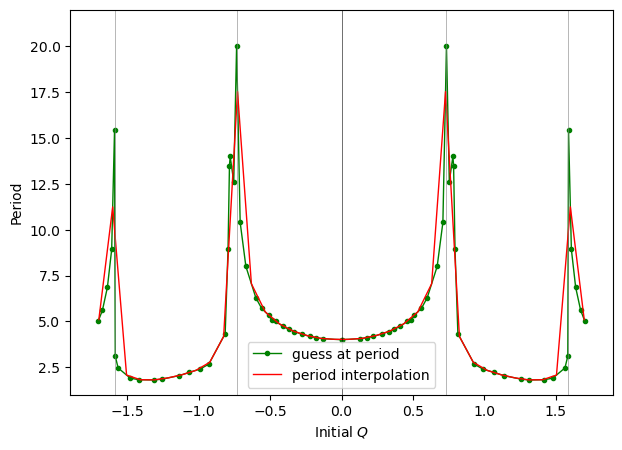

In [2]:
from scipy.interpolate import interp1d

Q0_by_hand     = np.array([0.0000, 0.1300, 0.1800, 0.2200, 0.2800, 0.3300, 0.3700, 0.4100, 0.4600, 0.4900, 0.5100, 0.5600, 0.6000, 0.6700,
                           0.7100, 0.7350, 0.7550, 0.7800, 0.7850, 0.7950, 0.8150, 0.9300, 0.9900, 1.0650, 1.1350, 1.2600, 1.3150, 1.4200,
                           1.4800, 1.5650, 1.5850, 1.5900, 1.6100, 1.6400, 1.6750, 1.7050])
period_by_hand = np.array([1.0000, 1.0141, 1.0277, 1.0455, 1.0769, 1.1111, 1.1429, 1.1818, 1.2500, 1.2727, 1.3333, 1.4286, 1.5714, 2.0000,
                           2.6000, 5.0000, 3.1538, 3.5000, 3.3750, 2.2308, 1.0833, 0.6666, 0.6000, 0.5556, 0.5116, 0.4615, 0.4516, 0.4545,
                           0.4762, 0.6154, 0.7777, 3.8571, 2.2308, 1.7143, 1.4000, 1.2500])
period_by_hand = 4*period_by_hand

Q0_by_hand = np.concatenate((-np.flip(Q0_by_hand), Q0_by_hand))
period_by_hand = np.concatenate((np.flip(period_by_hand), period_by_hand))

period_interp = interp1d(Q0_by_hand, period_by_hand, kind='linear')

# test interpolation
Q0_mesh = np.linspace(-1.7,1.7,36)
period_interp_mesh = period_interp(Q0_mesh)

plt.figure(figsize=(7,5))
plt.plot(Q0_by_hand, period_by_hand, label="guess at period", color="green", linewidth=1.0, marker='.', linestyle='-')
plt.plot(Q0_mesh, period_interp_mesh, label="period interpolation", color="red", linewidth=1.0, linestyle='-')
plt.xlabel('Initial $Q$')
plt.ylabel('Period')
plt.xlim(-1.9,1.9)
plt.ylim(1,22)
plt.axvline(x = 0, linewidth='0.4', color='black')
# references for where the length of period changes abruptly
plt.axvline(x = -0.732581, linewidth='0.4', color='grey')
plt.axvline(x =  0.732581, linewidth='0.4', color='grey')
plt.axvline(x = -1.587, linewidth='0.4', color='grey')
plt.axvline(x =  1.587, linewidth='0.4', color='grey')
plt.legend()
plt.show()

#### PLAN:
1. **Find equilbrium points so I can apply the minimum finder correctly, to get $\tau$**
* Call $Q$ at the maxima (the point between the central well and the side well) $Q_\pm$. Call the $Q$ value with the same potential energy $Q_e$ (bc it's on the edge)... $U(Q_\pm) = U(Q_e)$
* Look for points near $\pm 0.7$ where $U'(Q) = 0$
* Get $U'(Q) = KQ - DQ^3 + \Phi Q^6$ and solve for when $U'(Q) = 0$
* Extract $Q_\pm$ and verify it's the right value by comparing with experimental data
* Find $U(Q_\pm)$ by plugging $Q_\pm$ into $U(Q)$. Solve for $U(Q) = U(Q_\pm)$ to find $Q_e$
2. **Apply minimum finder**
* Use different schema for $Q \in (0, Q_\pm), Q \in (Q_\pm, Q_e),$ and $Q \in (Q_e, 1.7)$
* Separate $\tau$ interpolation and its accompanying $Q_0$ array into three different arrays, one for each scheme
* Apply minimum finder to the anharmonic oscillator mesh `Q_vals_anharmonic` using the guess for period found above
* Extract numerically found $\tau$ and convert to angular frequency with $\omega = \frac{2\pi}{\tau}$
3. **Plot $\omega$ vs $Q_0$**
* Interpolate the numerical $\omega$ values and mirror them across the vertical axis
* Plot $\omega$ vs a mesh of $Q_0 \in (-1.7, 1.7)$

$\frac{dU}{dQ} = KQ - DQ^3 + \Phi Q^5 \rightarrow \frac{dU}{dQ} = 0$

Solutions:

$Q = \pm\frac{1}{\sqrt{2}}\cdot\sqrt{\frac{D \pm \sqrt{D^2 - 4K\Phi}}{\Phi}}$

$Q = \{-1.36503, -0.73258, 0, 0.73258, 1.36503\}$

Solution of interest is $0.73258$

$U(\pm0.73258) = \pm0.121288$

$U(Q_\pm) = U(Q_e) = 0.121288 = \frac12KQ^2 - \frac14DQ^4 + \frac16\Phi Q^6$

ok nvm the wolfram alpha solutions are like five sentences long let's do a different approach

From the data, the approach flips somewhere between $1.585$ and $1.590$, so maybe just say $\pm0.587$ as an estimate for $Q_e$

**Add analytical values for $\tau$ at $Q_\pm$ and $Q_e$ so the interpolation goes all the way to the edges**:

$\omega = \omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)$

$\tau = \frac{2\pi}{\omega} = \frac{2\pi}{\omega_0(1 - \frac{3D}{2K}Q^2 + \frac{5\Phi}{2K}Q^4)}$

With $Q = Q_\pm: \tau = 4.4125$

With $Q = Q_e: \tau = 0.4309$

In [6]:
# reference
Q0_by_hand     = np.array([0.0000, 0.1300, 0.1800, 0.2200, 0.2800, 0.3300, 0.3700, 0.4100, 0.4600, 0.4900, 0.5100, 0.5600, 0.6000, 0.6700,
                           0.7100, 0.7350, 0.7550, 0.7800, 0.7850, 0.7950, 0.8150, 0.9300, 0.9900, 1.0650, 1.1350, 1.2600, 1.3150, 1.4200,
                           1.4800, 1.5650, 1.5850, 1.5900, 1.6100, 1.6400, 1.6750, 1.7050])
period_by_hand = np.array([1.0000, 1.0141, 1.0277, 1.0455, 1.0769, 1.1111, 1.1429, 1.1818, 1.2500, 1.2727, 1.3333, 1.4286, 1.5714, 2.0000,
                           2.6000, 5.0000, 3.1538, 3.5000, 3.3750, 2.2308, 1.0833, 0.6666, 0.6000, 0.5556, 0.5116, 0.4615, 0.4516, 0.4545,
                           0.4762, 0.6154, 0.7777, 3.8571, 2.2308, 1.7143, 1.4000, 1.2500])

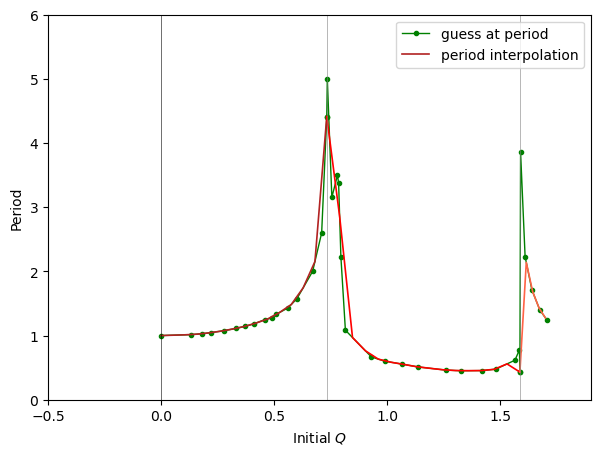

In [7]:
from scipy.interpolate import interp1d

Qpm = 0.732581
Qe = 1.587

# central well
Q0_by_hand_1     = np.array([0.0000, 0.1300, 0.1800, 0.2200, 0.2800, 0.3300, 0.3700, 0.4100,
                             0.4600, 0.4900, 0.5100, 0.5600, 0.6000, 0.6700, 0.7100, Qpm])
period_by_hand_1 = np.array([1.0000, 1.0141, 1.0277, 1.0455, 1.0769, 1.1111, 1.1429, 1.1818,
                             1.2500, 1.2727, 1.3333, 1.4286, 1.5714, 2.0000, 2.6000, 4.4125])
# edge well
Q0_by_hand_2     = np.array([Qpm,    0.7350, 0.7550, 0.7800, 0.7850, 0.7950, 0.8150, 0.9300, 0.9900,
                             1.0650, 1.1350, 1.2600, 1.3250, 1.4200, 1.4800, 1.5650, 1.5850, Qe])
period_by_hand_2 = np.array([4.4125, 5.0000, 3.1538, 3.5000, 3.3750, 2.2308, 1.0833, 0.6666, 0.6000,
                             0.5556, 0.5116, 0.4615, 0.4516, 0.4545, 0.4762, 0.6154, 0.7777, 0.4309])
# edge wall, high enough to get through all wells
Q0_by_hand_3     = np.array([Qe,     1.5900, 1.6100, 1.6400, 1.6750, 1.7050])
period_by_hand_3 = np.array([0.4309, 3.8571, 2.2308, 1.7143, 1.4000, 1.2500])


# interpolate the data
period_interp_1 = interp1d(Q0_by_hand_1, period_by_hand_1, kind='linear')
period_interp_2 = interp1d(Q0_by_hand_2, period_by_hand_2, kind='linear')
period_interp_3 = interp1d(Q0_by_hand_3, period_by_hand_3, kind='linear')

# test interpolation with graph
Q0_mesh_1 = np.linspace(0,Qpm,15)
period_interp_mesh_1 = period_interp_1(Q0_mesh_1)

Q0_mesh_2 = np.linspace(Qpm,Qe,16)
period_interp_mesh_2 = period_interp_2(Q0_mesh_2)

Q0_mesh_3 = np.linspace(Qe,1.7,5)
period_interp_mesh_3 = period_interp_3(Q0_mesh_3)

# create plot
plt.figure(figsize=(7,5))
# period interpolation for each schema
plt.plot(Q0_by_hand_1, period_by_hand_1, label="guess at period", color="green", linewidth=1.0, marker='.', linestyle='-')
plt.plot(Q0_by_hand_2, period_by_hand_2, color="green", linewidth=1.0, marker='.', linestyle='-')
plt.plot(Q0_by_hand_3, period_by_hand_3, color="green", linewidth=1.0, marker='.', linestyle='-')
plt.plot(Q0_mesh_1, period_interp_mesh_1, label="period interpolation", color="firebrick", linewidth=1.2, linestyle='-')
plt.plot(Q0_mesh_2, period_interp_mesh_2, color="red", linewidth=1.2, linestyle='-')
plt.plot(Q0_mesh_3, period_interp_mesh_3, color="tomato", linewidth=1.2, linestyle='-')
# labels & gridlines
plt.xlabel('Initial $Q$')
plt.ylabel('Period')
plt.xlim(-0.5,1.9)
plt.ylim(0,6)
plt.axvline(x = 0, linewidth='0.4', color='black')
# references for where the length of period changes abruptly
plt.axvline(x = -Qpm, linewidth='0.4', color='grey')
plt.axvline(x =  -Qe, linewidth='0.4', color='grey')
plt.axvline(x =  Qpm, linewidth='0.4', color='grey')
plt.axvline(x =   Qe, linewidth='0.4', color='grey')
plt.legend()
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# copy-pasted anharmonic oscillator solver, fix later
def anharmonic_oscillator(t_vals, y, K=1.0, D=2.4, Phi=1.0, M = 1.0):
    Q, V = y
    dQdt = V
    dVdt = -(K/M*Q) + (D/M*Q**3) - (Phi/M*Q**5)
    return [dQdt, dVdt]

# initial conditions
Q0 = 0.01 # (temporarily)
V0  = 0
K   = 1.0
D   = 2.4
Phi = 1.0
M   = 1.0
t_max = 100

y0 = Q0, V0
sol = solve_ivp(anharmonic_oscillator,
                [0, t_max],
                y0,
                t_eval=np.linspace(0, t_max, 500),
                args=(K, D, Phi, M))

# define mesh for plotting
Q_vals_anharmonic = sol.y[0]
Q0_vals = np.linspace(0,1.705,500)

Q_anharmonic_interp = interp1d(Q0_vals, Q_vals_anharmonic, kind='linear')

period_numerical = np.array([])

# Minimization (finding the local minimum)
j = 0
for i in Q0_by_hand_1:
    # print(Q_vals_anharmonic[j])
    # period_numerical = np.append(period_numerical, minimize(Q_anharmonic_interp, period_interp_1.y(i)))
    j += 1
# print(period_interp_1.y)
# for i in Q0_by_hand_2:
#     period_numerical = np.append(period_numerical, minimize(Q_vals_anharmonic, period_interp_2(i)).y)
# # print(period_interp_2.x)
# for i in Q0_by_hand_3:
#     period_numerical = np.append(period_numerical, minimize(Q_vals_anharmonic, period_interp_3(i)).y)


# print(period_numerical)
print(period_interp_1.x)
print(period_interp_1.y period_interp_2.y)

[0.       0.13     0.18     0.22     0.28     0.33     0.37     0.41
 0.46     0.49     0.51     0.56     0.6      0.67     0.71     0.732581]


TypeError: only integer scalar arrays can be converted to a scalar index